# Generate a simulation of a population by running envs_beta/BogoBetaEnv  environment

JMA 14 March 2023

See also `generate_primary_sim.py`

In [4]:
%reload_ext autoreload
%autoreload 2
import math, os, re, sys
from pathlib import Path
import pandas as pd
import numpy as np

sys.path.append('./benvs/policies')

from BogoPolicies import BogoPolicies

In [4]:
### Use this policy for test

MAX_DOSE = 0.7 
VERBOSE = 0
PATIENTS = 1000
# Moved to BogoPolicies.py
# def randomized_const_policy(yesterday, today):  # default policy
#     dose = BogoPolicies.my_rng.uniform(low=0, high=MAX_DOSE, size=1)[0]
#     if VERBOSE: print(f'chohort dose: {dose:.3}')
#     return dose
   

### a test run
def test_patient_run(env, policy):
    ''
    record_df = pd.DataFrame()
    for p in range(PATIENTS):
        # Create a patient with a random Id. 
        the_patient = BogoPolicies.my_rng.integers(low=0, high=100000, size=1)[0]
        observation, info = env.reset(id_serial= the_patient)
        print('\tpatient: ', the_patient)
        for _ in range(BogoPolicies.MAX_DAYS):
            observation, reward, terminated, info = env.step(policy)
            if VERBOSE == 2: 
                print(env.today)
            elif VERBOSE == 1:
                print(f'i: {info} # obs: {env.get_observation()}, R: {reward}, end? {terminated}' )
            else:
                pass
            if terminated:
                break
        episode_df, total_reward = env.close()
        print(f'reward {total_reward}')
        record_df = pd.concat([record_df, episode_df])
    return record_df

def run_stats(rdf):
    'Extract the dose-respose curve from the patient episodes'
    # For each patient run 
    print(rdf.groupby('patient_id').mean('dose'))
    
        


In [5]:
# All const policies test
bogo_env = BogoPolicies()
print(f'n cohorts {bogo_env.NUM_COHORTS}')
df = test_patient_run(bogo_env, bogo_env.dose_cohort_policy)
#df.to_csv('cohort_const.csv', header=True,  index=False)
print(run_stats(df))
print(f'DONE! - record cnt {df.shape[0]}')
    

AttributeError: 'BogoPolicies' object has no attribute 'NUM_COHORTS'

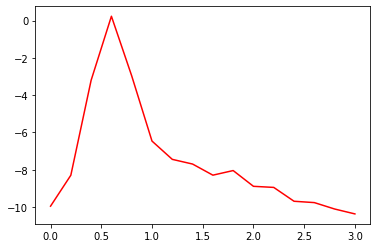

In [6]:
import matplotlib.pyplot as plt

xavg = df.groupby('cohort').mean()
xavg.sort_values('drug', inplace=True)
# xmax = df.groupby('cohort').max()
# xmin = df.groupby('cohort').min()

#plt.plot(xmax['drug'], xmax['reward'], color = 'black')
plt.plot(xavg['drug'], xavg['reward'], color = 'red')
# plt.plot(xmin['drug'], xmin['reward'], color = 'blue')

In [6]:

bogo_env = BogoPolicies()
print(f'n cohorts {bogo_env.NUM_COHORTS}')
df = test_patient_run(bogo_env, bogo_env.standard_of_care_policy)
df.to_csv('cnt_100_patients.csv', header=True,  index=False)
print(f'DONE! - record cnt {df.shape[0]}')
    

AttributeError: 'BogoPolicies' object has no attribute 'NUM_COHORTS'

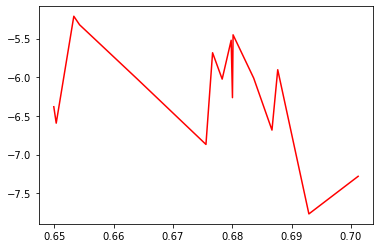

In [8]:
import matplotlib.pyplot as plt

xavg = df.groupby('cohort').mean()
xavg.sort_values('drug', inplace=True)
# xmax = df.groupby('cohort').max()
# xmin = df.groupby('cohort').min()

#plt.plot(xmax['drug'], xmax['reward'], color = 'black')
plt.plot(xavg['drug'], xavg['reward'], color = 'red')
# plt.plot(xmin['drug'], xmin['reward'], color = 'blue')